In [1]:
import yfinance as yf

Data from and To

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-18,4.463052,4.471977,4.420167,4.432562,284663002
2005-03-21,4.483877,4.515854,4.393892,4.443966,300470030
2005-03-22,4.427357,4.510153,4.408765,4.491313,226112360
2005-03-23,4.436776,4.468010,4.411739,4.411739,194526410
2005-03-24,4.443470,4.483380,4.442230,4.479414,148763520


In [5]:
google_data.shape

(5031, 5)

In [6]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,50.326911,50.838734,49.801693,50.306821,1.041221e+08
std,48.188585,48.698229,47.679938,48.162112,1.344245e+08
min,4.427357,4.468010,4.393892,4.411244,1.584340e+05
25%,13.484971,13.629739,13.356313,13.509759,2.620400e+07
50%,28.589722,28.817234,28.363838,28.644313,4.854600e+07
75%,67.724972,68.477655,67.131661,67.765045,1.275945e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-03-18 to 2025-03-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [8]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of google data')

<Figure size 1500x500 with 0 Axes>

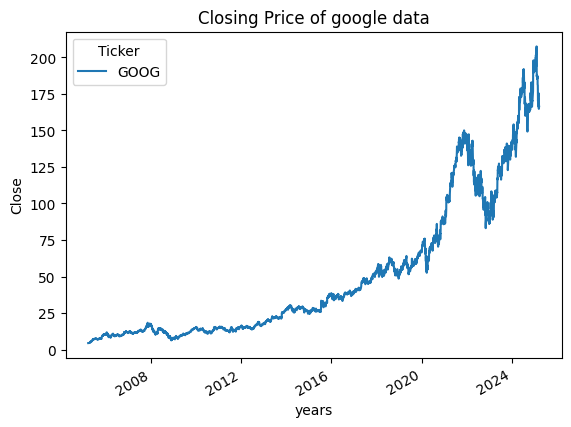

In [10]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel('Close')
plt.title("Closing Price of google data")

In [11]:
def plot_graph(figsize, values, Column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(Column_name)
    plt.title(f"{Column_name} of google data")

In [12]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

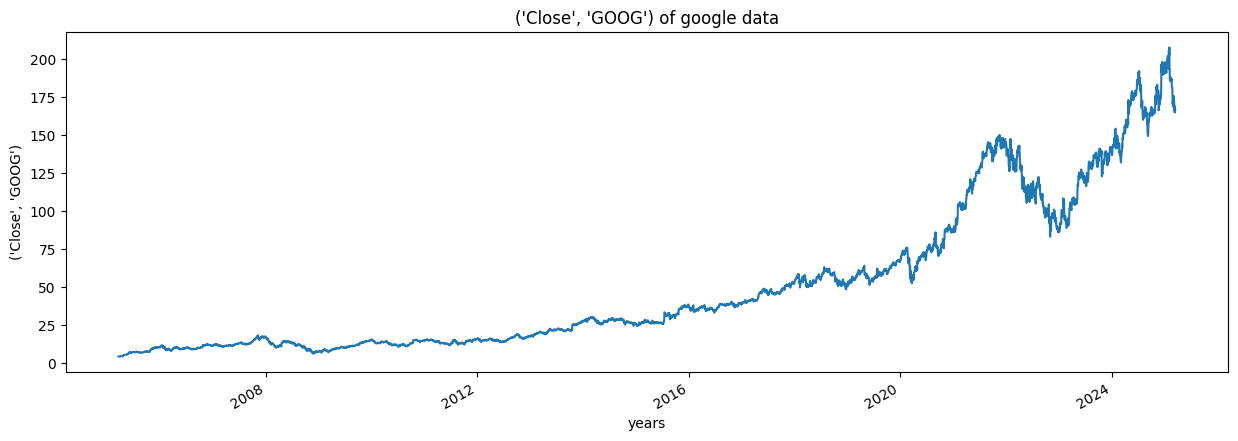

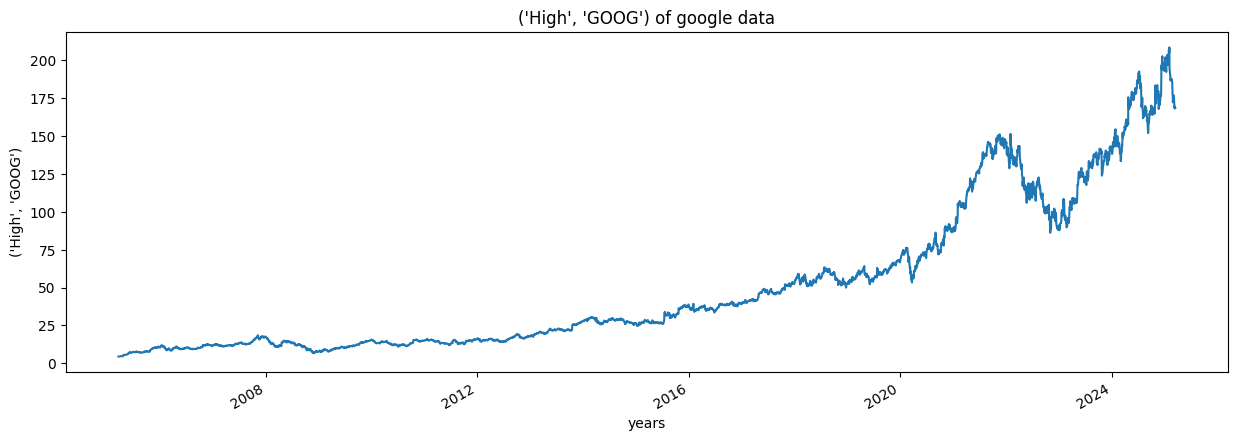

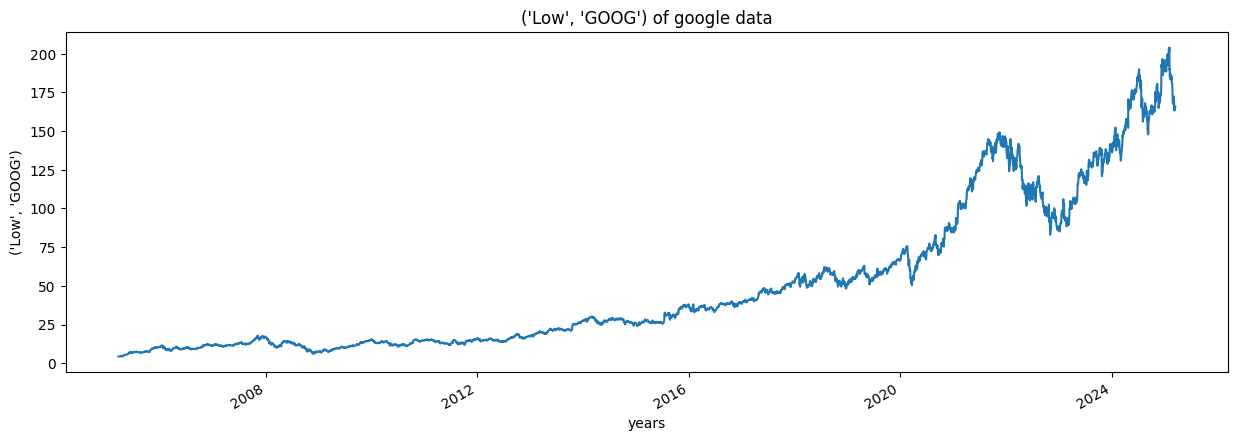

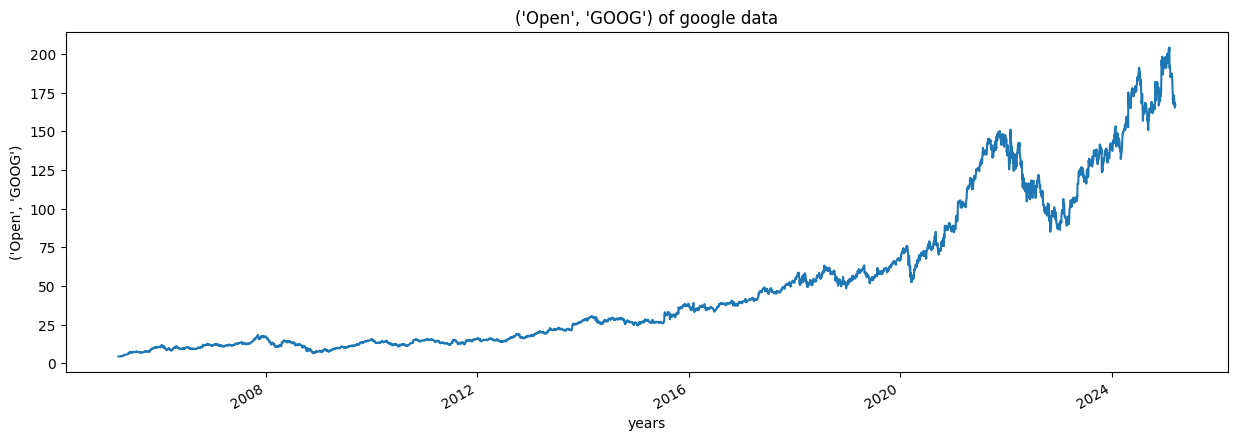

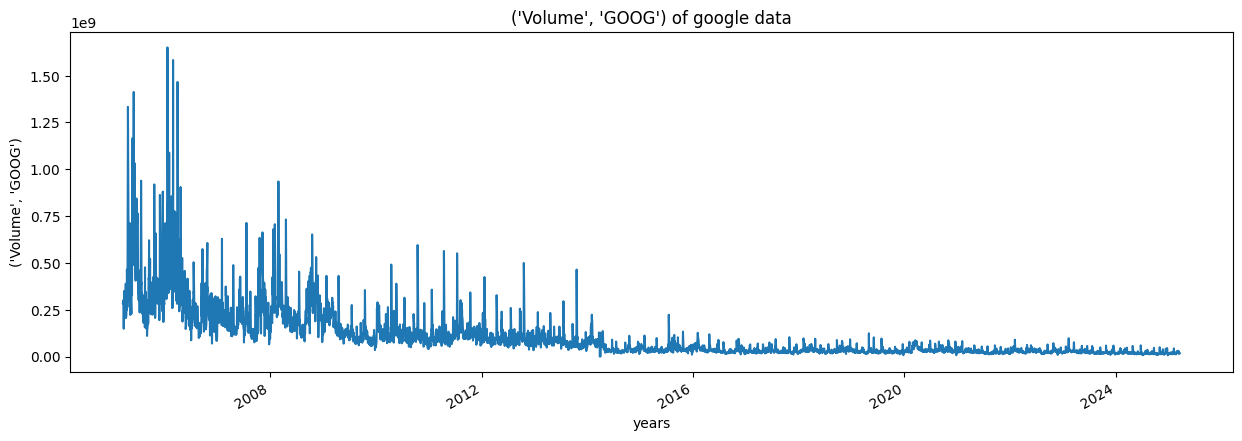

In [13]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [14]:
10, 20, 30, 40, 50, 60, 70, 80, 90, 100

(10, 20, 30, 40, 50, 60, 70, 80, 90, 100)

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[:5])/5)

30.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2005,2026):
    print(i,list(google_data.index.year).count(i))

2005 200
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 50


In [19]:
google_data['MA_For_250_days'] =  google_data['Close'].rolling(250).mean()

In [20]:
google_data['MA_For_250_days'][0:250].tail()

Date
2006-03-09         NaN
2006-03-10         NaN
2006-03-13         NaN
2006-03-14         NaN
2006-03-15    7.925678
Name: MA_For_250_days, dtype: float64

In [ ]:
plot_graph((15,5), google_data['MA_For_250_days'], 'MA_For_250_days')

In [ ]:
plot_graph((15,5), google_data[['Close','MA_For_250_days']], 'MA_For_250_days')

<Figure size 640x480 with 0 Axes>

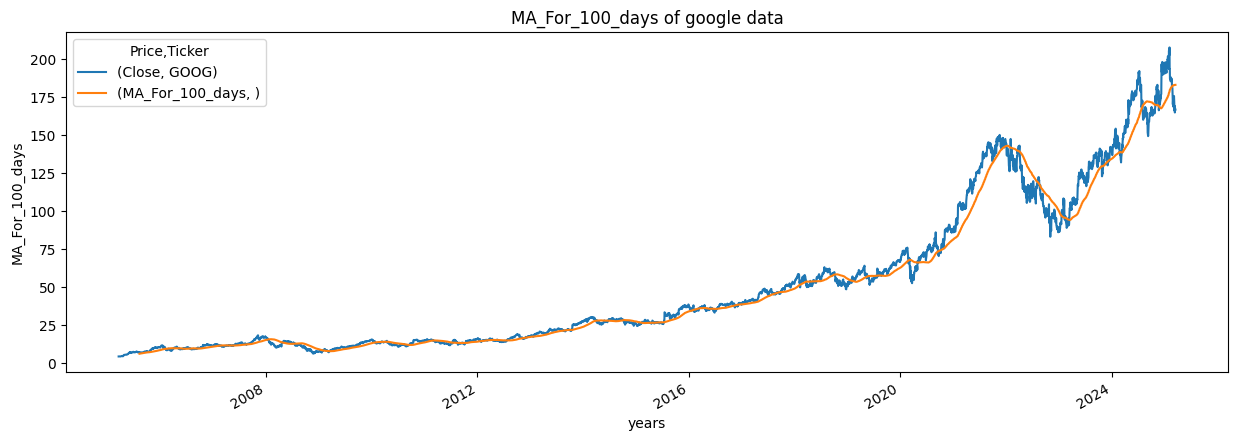

In [23]:
google_data['MA_For_100_days'] =  google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_For_100_days']], 'MA_For_100_days')

<Figure size 640x480 with 0 Axes>

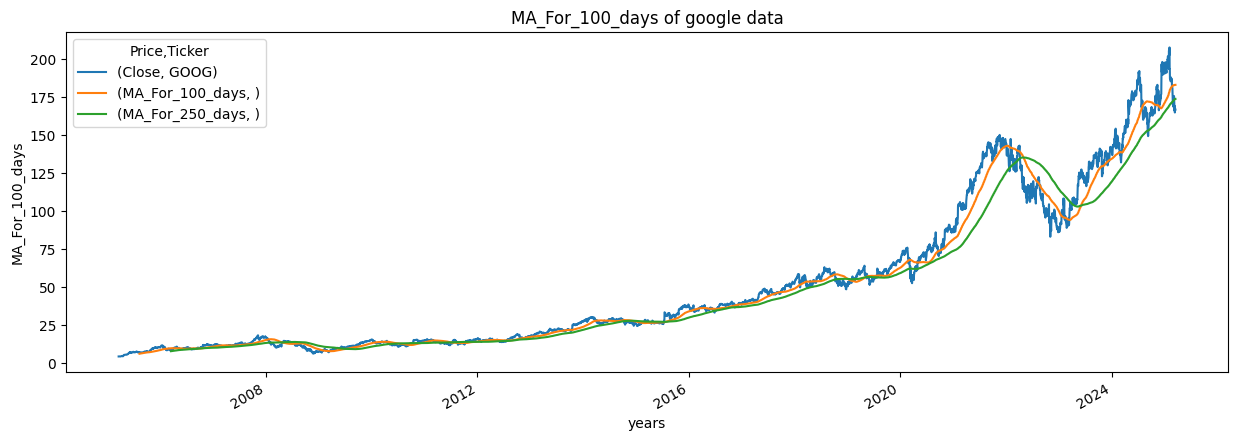

In [24]:
plot_graph((15,5), google_data[['Close','MA_For_100_days','MA_For_250_days']], 'MA_For_100_days')

In [25]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close', 'percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-03-18,4.463052,NaN
2005-03-21,4.483877,0.004666
2005-03-22,4.427357,-0.012605
2005-03-23,4.436776,0.002127
2005-03-24,4.443470,0.001509


In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [27]:
Close_price = google_data[['Close']]

In [28]:
max(Close_price.values),min(Close_price.values)

(array([207.47363281]), array([4.4273572]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

In [30]:
datalen = len(scaled_data)
datalen

5031

In [31]:
x_data = []
y_data = []

for i in range (100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np

x_data, y_data = np.array(x_data), np.array(y_data)


In [ ]:
x_data[0],y_data[0]

70% data

In [33]:
int(len(x_data)*0.7)

3451

-100 for Moving Average

In [34]:
datalen-100-int(len(x_data)*0.7)

1480

In [35]:
spliting_len = int(len(x_data)*0.7)
x_train = x_data[:spliting_len]
y_train = y_data[:spliting_len]

x_test = x_data[spliting_len:]
y_test = y_data[spliting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

In [38]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.0))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.0))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [39]:
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.0))
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.0))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [40]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    }
    return metrics

In [41]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [ ]:
lstm_model = create_lstm_model(input_shape)
lstm_history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)
lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

c:\Users\senth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - loss: 0.0014 - val_loss: 1.6455e-04
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - loss: 1.9781e-05 - val_loss: 8.3998e-05
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 264ms/step - loss: 1.5741e-05 - val_loss: 8.2919e-05
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - loss: 1.7462e-05 - val_loss: 8.2106e-05
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - loss: 1.4834e-05 - val_loss: 8.3587e-05
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - loss: 1.7640e-05 - val_loss: 9.2189e-05
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 354ms/step - loss: 1.4470e-05 - val_loss: 9.3499e-05
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 349ms/step - loss: 1.5098e-05 - val_loss: 7.5427e-05
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - loss: 1.3497e-05 - val_loss: 7.4143e-05
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - loss: 1.3523e-05 - val_loss: 8.2984e-05
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


In [43]:
lstm_predictions

array([[ 62.596283],
       [ 62.916286],
       [ 62.99955 ],
       ...,
       [176.44728 ],
       [175.45929 ],
       [174.59854 ]], dtype=float32)

In [44]:
gru_model = create_gru_model(input_shape)
gru_history = gru_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)
gru_predictions = gru_model.predict(x_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

c:\Users\senth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 0.0019 - val_loss: 5.5673e-05
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - loss: 9.2045e-06 - val_loss: 4.6342e-05
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - loss: 7.4793e-06 - val_loss: 4.3557e-05
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - loss: 6.6950e-06 - val_loss: 4.8621e-05
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - loss: 8.3204e-06 - val_loss: 4.5136e-05
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 301ms/step - loss: 6.8682e-06 - val_loss: 4.1713e-05
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - loss: 6.3322e-06 - val_loss: 5.2712e-05
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - loss: 8.1864e-06 - val_loss: 4.0704e-05
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - loss: 6.3606e-06 - val_loss: 3.9794e-05
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - loss: 5.9588e-06 - val_loss: 3.9410e-05
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step


In [45]:
gru_predictions

array([[ 62.596367],
       [ 62.98973 ],
       [ 62.31822 ],
       ...,
       [166.34169 ],
       [164.99521 ],
       [164.35696 ]], dtype=float32)

In [46]:
y_test_inv = scaler.inverse_transform(y_test)
y_test_inv

array([[ 64.07550812],
       [ 59.14386368],
       [ 58.12867355],
       ...,
       [164.72999573],
       [167.61999512],
       [166.57000732]])

In [47]:
lstm_metrics = evaluate_model(y_test_inv, lstm_predictions, 'LSTM')
gru_metrics = evaluate_model(y_test_inv, gru_predictions, 'GRU')

In [48]:
comparison_df = pd.DataFrame([lstm_metrics, gru_metrics])
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
  Model        MSE      RMSE       MAE  R2 Score
0  LSTM  24.757436  4.975685  3.595044  0.983041
1   GRU  14.160805  3.763084  2.839095  0.990300


In [49]:
rmse = np.sqrt(np.mean(lstm_predictions - y_test_inv)**2)
rmse

1.9309535851349702

In [50]:
rmse = np.sqrt(np.mean(gru_predictions - y_test_inv)**2)
rmse

1.670811060312632

In [51]:
plotting_data = pd.DataFrame(
    {
        'original_test_data':y_test_inv.reshape(-1),
        'predictions' : lstm_predictions.reshape(-1)
     } ,
     index=google_data.index[spliting_len+100:]
)

plotting_data.head()
plotting_data.tail()

,original_test_data,predictions
Date,,
2025-03-11,165.979996,178.286621
2025-03-12,169.000000,177.314499
2025-03-13,164.729996,176.447281
2025-03-14,167.619995,175.459290
2025-03-17,166.570007,174.598541


In [52]:
plotting_data = pd.DataFrame(
    {
        'original_test_data':y_test_inv.reshape(-1),
        'predictions' : gru_predictions.reshape(-1)
     } ,
     index=google_data.index[spliting_len+100:]
)

plotting_data.head()
plotting_data.tail()

,original_test_data,predictions
Date,,
2025-03-11,165.979996,168.962372
2025-03-12,169.000000,167.311539
2025-03-13,164.729996,166.341690
2025-03-14,167.619995,164.995209
2025-03-17,166.570007,164.356964


<Figure size 640x480 with 0 Axes>

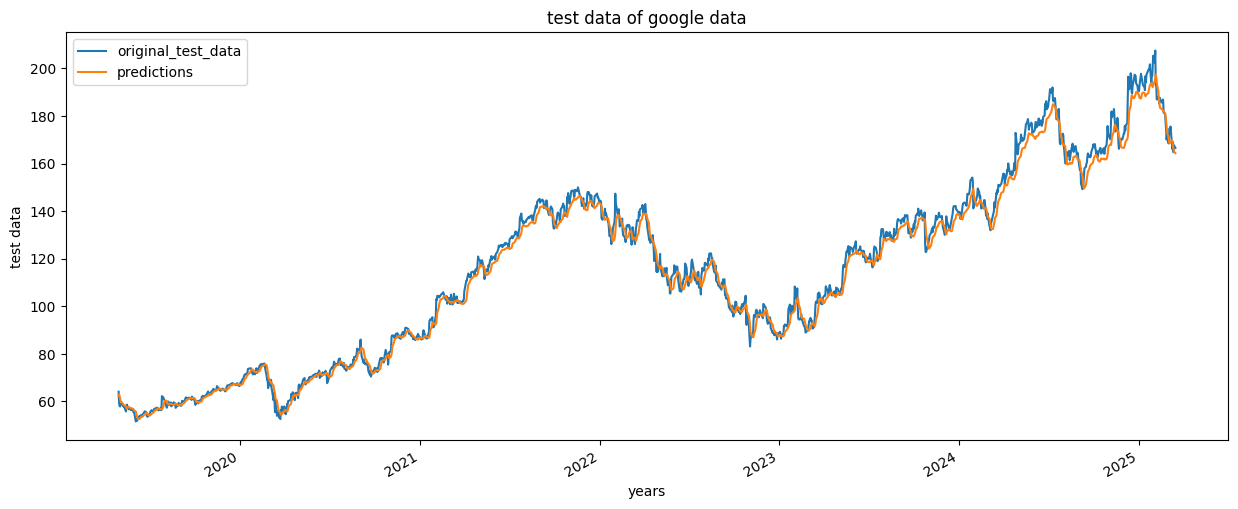

In [53]:
plot_graph((15,6),plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

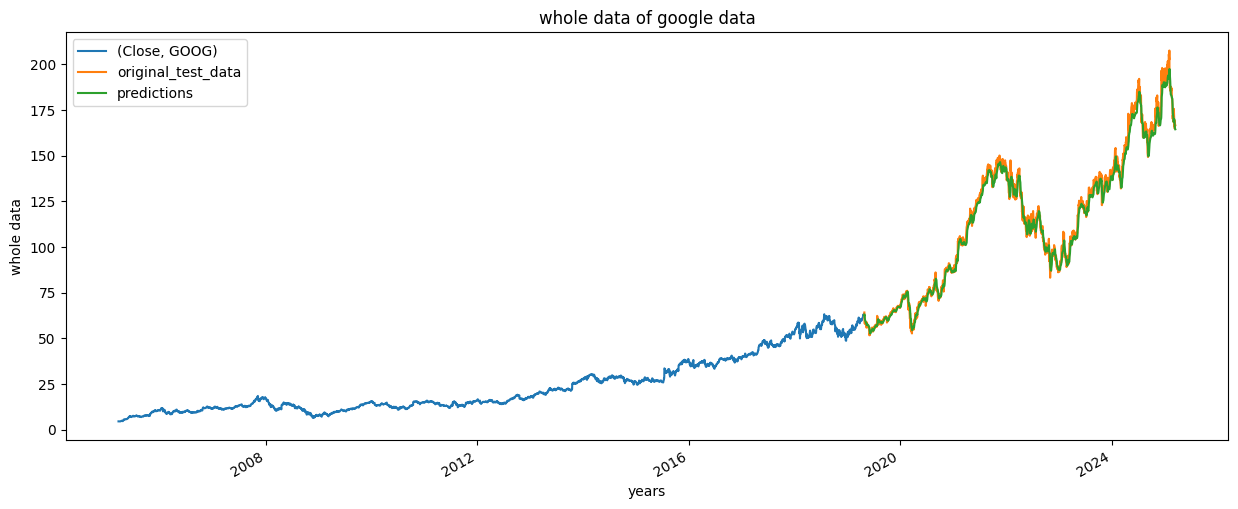

In [54]:
plot_graph((15,6),pd.concat([Close_price[:spliting_len+100],plotting_data], axis=0), 'whole data')

In [55]:
lstm_model.save("Latest_Stock_Price_Lstm_Model.keras")

In [56]:
gru_model.save("Latest_Stock_Price_Gru_Model.keras")